In [235]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [236]:
!pip install geopandas


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [237]:
#import Pop_County
df_census2020 = pd.read_csv('DECENNIALPL2020.P1-2024-11-10T174624.csv')
df_population_bycounty = df_census2020.head(1)
df_population_bycounty.columns = df_population_bycounty.columns.str.replace(' County, California', '', regex=False)
county_names = df_population_bycounty.columns[1:]
populations = df_population_bycounty.iloc[0, 1:].replace(',', '', regex=True).astype(int)
df_population_bycounty = pd.DataFrame({
    'County': county_names,
    'Population': populations
}).reset_index(drop=True)
df_population_bycounty = df_population_bycounty.rename(columns={'County': 'CountyName'})
print(len(df_population_bycounty))
df_population_bycounty.head()
# county_names


58


,CountyName,Population
0,Alameda,1682353
1,Alpine,1204
2,Amador,40474
3,Butte,211632
4,Calaveras,45292


In [238]:
# import hospital data

# df_hospital = pd.read_csv('ed-volume-and-capacity-2021.csv', encoding = "ISO-8859-1", index_col=[0])
# df_hospital = df_hospital[df_hospital["Category"] == "Asthma"]
# df_hospital_bycounty = df_hospital.groupby('CountyName')['EDDXCount'].sum().reset_index()
# df_hospital_bycounty.head()

df_hospital = pd.read_csv('asthma-emergency-department-visit-rates-by-county-2015_2022.csv', encoding = "ISO-8859-1")
df_hospital_bycounty = df_hospital[df_hospital["STRATA NAME"] == "All ages"]
df_hospital_bycounty = df_hospital_bycounty[df_hospital_bycounty["YEAR"] <= 2019]
df_hospital_bycounty = df_hospital_bycounty.rename(columns={'COUNTY': 'CountyName'})
df_hospital_bycounty = df_hospital_bycounty[["CountyName", "YEAR", "NUMBER OF ED VISITS"]]
df_hospital_bycounty = df_hospital_bycounty[df_hospital_bycounty["CountyName"] != "California"]
print(len(df_hospital_bycounty))
df_hospital_bycounty.head()

290


,CountyName,YEAR,NUMBER OF ED VISITS
1,Alameda,2015,"9,939"
2,Alpine,2015,0
3,Amador,2015,196
4,Butte,2015,"1,044"
5,Calaveras,2015,185


In [239]:
df_hospital_pop_bycounty = pd.merge(df_population_bycounty, df_hospital_bycounty, on='CountyName', how='inner')
df_hospital_pop_bycounty["NUMBER OF ED VISITS"] = df_hospital_pop_bycounty["NUMBER OF ED VISITS"].replace({',': ''}, regex=True)
df_hospital_pop_bycounty["NUMBER OF ED VISITS"] = pd.to_numeric(df_hospital_pop_bycounty["NUMBER OF ED VISITS"])
df_hospital_pop_bycounty["NormalizedVisits"] = df_hospital_pop_bycounty["NUMBER OF ED VISITS"] /  df_hospital_pop_bycounty["Population"] * 10000

df_hospital_pop_bycounty = df_hospital_pop_bycounty[df_hospital_pop_bycounty['NormalizedVisits'] >= 10] # remove 1 outlier 

print(len(df_hospital_pop_bycounty))
df_hospital_pop_bycounty.head(n=6)

284


,CountyName,Population,YEAR,NUMBER OF ED VISITS,NormalizedVisits
0,Alameda,1682353,2015,9939.0,59.077970
1,Alameda,1682353,2016,9086.0,54.007690
2,Alameda,1682353,2017,8942.0,53.151746
3,Alameda,1682353,2018,7795.0,46.333914
4,Alameda,1682353,2019,7448.0,44.271327
10,Amador,40474,2015,196.0,48.426150


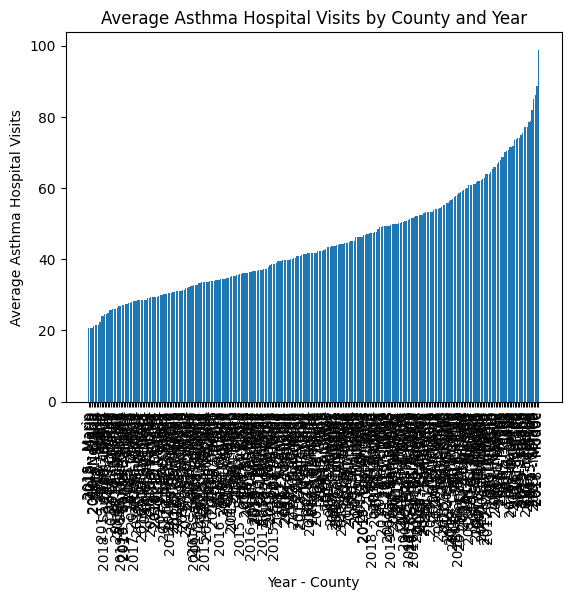

In [240]:
df_hospital_pop_bycounty['YearCounty'] = df_hospital_pop_bycounty['YEAR'].astype(str) + ' - ' + df_hospital_pop_bycounty['CountyName']
df_hospital_pop_bycounty_sorted = df_hospital_pop_bycounty.sort_values(by='NormalizedVisits', ascending=True)
plt.bar(df_hospital_pop_bycounty_sorted['YearCounty'], df_hospital_pop_bycounty_sorted['NormalizedVisits'])
plt.xticks(rotation=90)
plt.xlabel('Year - County')
plt.ylabel('Average Asthma Hospital Visits')
plt.title('Average Asthma Hospital Visits by County and Year')
plt.show()

In [241]:
# import matplotlib.pyplot as plt

# df_hospital_pop_bycounty_sorted = df_hospital_pop_bycounty.sort_values(by='NormalizedVisits', ascending=True)

# plt.bar(df_hospital_pop_bycounty_sorted['CountyName'], df_hospital_pop_bycounty_sorted['NormalizedVisits'])
# plt.xticks(range(df_hospital_pop_bycounty_sorted['CountyName'].shape[0]), df_hospital_pop_bycounty_sorted['CountyName'], rotation='vertical')
# plt.xlabel('County')
# plt.ylabel('Average Asthma Hospital Visits')
# plt.title('Average Asthma Hospital Visits by County')
# plt.show()

In [242]:
# import air quality data
df_air_2019 = pd.read_csv('air_quality_2019.csv', encoding = "ISO-8859-1", index_col=[0])
# df_air_2019.head()
# print(df_air_2019.head())
df_air_2019 = df_air_2019[['Daily AQI Value', 'County']]
df_air_2019 = df_air_2019.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2019['Year'] = '2019'
# print(df_air_2019.head())

df_air_2018 = pd.read_csv('air_quality_2018.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2018 = df_air_2018[['Daily AQI Value', 'County']]
df_air_2018 = df_air_2018.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2018['Year'] = '2018'

df_air_2017 = pd.read_csv('air_quality_2017.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2017 = df_air_2017[['Daily AQI Value', 'County']]
df_air_2017 = df_air_2017.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2017['Year'] = '2017'

df_air_2016 = pd.read_csv('air_quality_2016.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2016 = df_air_2016[['Daily AQI Value', 'County']]
df_air_2016 = df_air_2016.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2016['Year'] = '2016'

df_air_2015 = pd.read_csv('air_quality_2015.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2015 = df_air_2015[['Daily AQI Value', 'County']]
df_air_2015 = df_air_2015.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2015['Year'] = '2015'

# data selection/merging
df_air_by_county = pd.concat([df_air_2015, df_air_2016, df_air_2017, df_air_2018, df_air_2019], axis=0)# Combine all years into one dataframe
df_air_by_county = df_air_by_county.rename(columns={'County': 'CountyName'})
df_air_by_county = df_air_by_county.rename(columns={'Daily AQI Value': 'AverageAnnualAQI'})

df_air_by_county = df_air_by_county[df_air_by_county['AverageAnnualAQI'] <= 100] # remove 1 outlier

print(len(df_air_by_county))
df_air_by_county.head()

256


,CountyName,AverageAnnualAQI,Year
0,Alameda,43.954290,2015
2,Butte,41.676554,2015
3,Calaveras,37.753425,2015
4,Colusa,42.738589,2015
5,Contra Costa,42.250733,2015


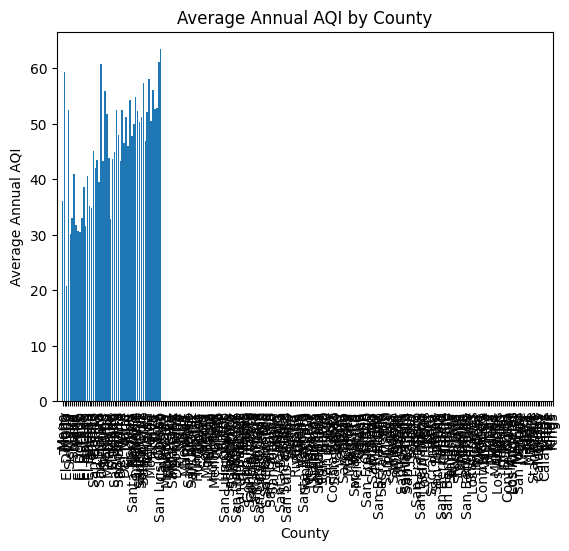

In [243]:
# Bar plot of AQI by county
import matplotlib.pyplot as plt
# plt.bar(df_air_by_county['CountyName'], df_air_by_county['AverageAnnualAQI'])
# plt.xticks(range(df_air_by_county['CountyName'].shape[0]), df_air_by_county['CountyName'], rotation='vertical')
# plt.show()

df_air_by_county_sorted = df_air_by_county.sort_values(by='AverageAnnualAQI', ascending=True)

plt.bar(df_air_by_county_sorted['CountyName'], df_air_by_county_sorted['AverageAnnualAQI'])
plt.xticks(range(df_air_by_county_sorted['CountyName'].shape[0]), df_air_by_county_sorted['CountyName'], rotation='vertical')
plt.xlabel('County')
plt.ylabel('Average Annual AQI')
plt.title('Average Annual AQI by County')
plt.show()


<Axes: xlabel='CountyName', ylabel='AverageAnnualAQI'>

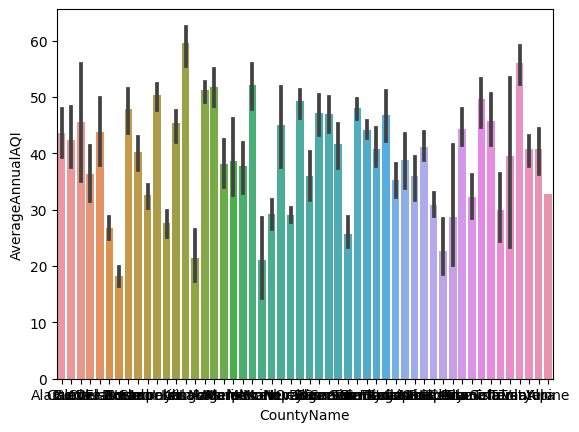

In [244]:
# Bar plot of AQI by county
seaborn.barplot(data = df_air_by_county, x="CountyName", y="AverageAnnualAQI")

In [245]:
df_hospital_pop_bycounty = df_hospital_pop_bycounty.rename(columns={"YEAR": "Year"})
df_hospital_pop_bycounty.head(n=10)

,CountyName,Population,Year,NUMBER OF ED VISITS,NormalizedVisits,YearCounty
0,Alameda,1682353,2015,9939.0,59.077970,2015 - Alameda
1,Alameda,1682353,2016,9086.0,54.007690,2016 - Alameda
2,Alameda,1682353,2017,8942.0,53.151746,2017 - Alameda
3,Alameda,1682353,2018,7795.0,46.333914,2018 - Alameda
4,Alameda,1682353,2019,7448.0,44.271327,2019 - Alameda
10,Amador,40474,2015,196.0,48.426150,2015 - Amador
11,Amador,40474,2016,187.0,46.202500,2016 - Amador
12,Amador,40474,2017,176.0,43.484706,2017 - Amador
13,Amador,40474,2018,137.0,33.848891,2018 - Amador
14,Amador,40474,2019,169.0,41.755201,2019 - Amador


In [246]:
df_air_by_county["Year"] = df_air_by_county["Year"].astype("int64")
df_air_by_county.head()

,CountyName,AverageAnnualAQI,Year
0,Alameda,43.954290,2015
2,Butte,41.676554,2015
3,Calaveras,37.753425,2015
4,Colusa,42.738589,2015
5,Contra Costa,42.250733,2015


In [247]:
# merge AQI and hospital data
df_hospital_aqi = pd.merge(df_hospital_pop_bycounty[["CountyName", "Year", "NormalizedVisits"]], df_air_by_county, on=["Year", "CountyName"], how='inner')
print(len(df_hospital_aqi))
df_hospital_aqi.head(n=50)

255


,CountyName,Year,NormalizedVisits,AverageAnnualAQI
0,Alameda,2015,59.077970,43.954290
1,Alameda,2016,54.007690,39.243949
2,Alameda,2017,53.151746,46.097820
3,Alameda,2018,46.333914,51.224222
4,Alameda,2019,44.271327,37.231633
5,Butte,2015,49.330914,41.676554
6,Butte,2016,36.383912,39.391176
7,Butte,2017,44.227716,44.187359
8,Butte,2018,42.857413,52.523776
9,Butte,2019,35.580631,34.128389


<Axes: xlabel='AverageAnnualAQI', ylabel='NormalizedVisits'>

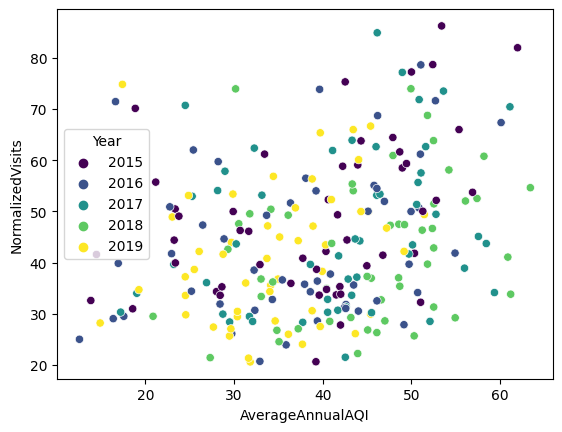

In [248]:
seaborn.scatterplot(data=df_hospital_aqi, x='AverageAnnualAQI', y='NormalizedVisits', hue='Year', palette='viridis')

In [249]:
# plot Hospital Visits by AQI per county in 2021
# seaborn.scatterplot(data = df_hospital_aqi, x='AverageAnnualAQI', y='NormalizedVisits')

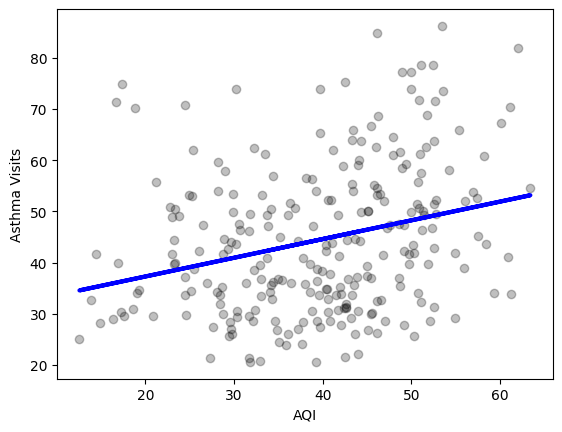

In [250]:
import statsmodels.api as sm

df_hospital_aqi = df_hospital_aqi.dropna(subset=['NormalizedVisits', 'AverageAnnualAQI'])

x = df_hospital_aqi["AverageAnnualAQI"]
y = df_hospital_aqi["NormalizedVisits"]

# In order to have an intercept, we need to add a column of 1's to X
x2 = sm.add_constant(x)

# Fit the simple linear regression
sm_model = sm.OLS(y, x2)
results = sm_model.fit()

# Make predictions using the linear regression
y_pred = results.predict(x2)

# Plot 
plt.scatter(x, y,  color='black', alpha = 0.25)
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('AQI')
plt.ylabel('Asthma Visits')
plt.show()

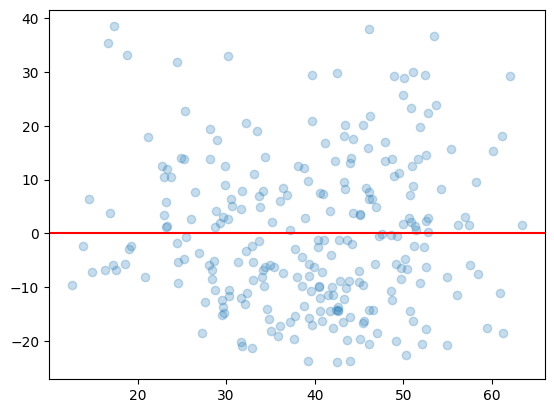

In [251]:
# Enter code here to plot the residuals (Question 7a)
residuals = y - y_pred
plt.scatter(x, residuals, alpha = 0.25)
plt.axhline(y=0, color = 'red')
plt.show()

In [252]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedVisits   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.91
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           7.52e-06
Time:                        11:50:33   Log-Likelihood:                -1033.6
No. Observations:                 255   AIC:                             2071.
Df Residuals:                     253   BIC:                             2078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.9708      3.277  

In [253]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import matplotlib.pyplot as plt

In [254]:
# import cjest
df_cjest = pd.read_csv('1.0-communities.csv', low_memory=False)
df_cjest = df_cjest[df_cjest['State/Territory'] == 'California']
# Select only the desired columns
df_cjest = df_cjest[['Census tract 2010 ID', 
                     'County Name', 
                     'State/Territory', 
                     'Percent Black or African American alone', 
                     'Percent American Indian / Alaska Native', 
                     'Percent Asian', 
                     'Percent Native Hawaiian or Pacific', 
                     'Percent two or more races', 
                     'Percent White', 
                     'Percent Hispanic or Latino', 
                     'Percent other races', 
                     'Identified as disadvantaged', 
                     'Percentage of tract that is disadvantaged by area', 
                     'Total population', 
                     'Is low income?', 
                     'Adjusted percent of individuals below 200% Federal Poverty Line (percentile)', 
                     'Adjusted percent of individuals below 200% Federal Poverty Line']]

# Display the resulting dataframe
df_cjest.head()

,Census tract 2010 ID,County Name,State/Territory,Percent Black or African American alone,Percent American Indian / Alaska Native,Percent Asian,Percent Native Hawaiian or Pacific,Percent two or more races,Percent White,Percent Hispanic or Latino,Percent other races,Identified as disadvantaged,Percentage of tract that is disadvantaged by area,Total population,Is low income?,Adjusted percent of individuals below 200% Federal Poverty Line (percentile),Adjusted percent of individuals below 200% Federal Poverty Line
3560,6001400100,Alameda County,California,0.03,0.00,0.12,0.0,0.05,0.74,0.03,0.01,False,0,3120.0,False,0.08,0.01
3561,6001400200,Alameda County,California,0.02,0.00,0.08,0.0,0.09,0.73,0.08,0.00,False,0,2007.0,False,0.12,0.03
3562,6001400300,Alameda County,California,0.09,0.00,0.11,0.0,0.01,0.67,0.06,0.02,False,0,5051.0,False,0.09,0.02
3563,6001400400,Alameda County,California,0.07,0.01,0.10,0.0,0.07,0.63,0.12,0.04,False,0,4007.0,False,0.30,0.12
3564,6001400500,Alameda County,California,0.21,0.00,0.10,0.0,0.15,0.45,0.09,0.02,False,0,4124.0,False,0.23,0.09


In [255]:
df_cjest["Disadvantaged Numeric"] = df_cjest["Identified as disadvantaged"].astype(int)
df_county_disadvantaged_status = (
    df_cjest.groupby("County Name")
    .apply(lambda group: (
        group["Disadvantaged Numeric"] * group["Total population"]
    ).sum() / group["Total population"].sum())
    .reset_index(name="Weighted Disadvantaged")
)
df_county_disadvantaged_status["County identified as disadvantaged"] = df_county_disadvantaged_status["Weighted Disadvantaged"] >= 0.5
df_county_disadvantaged_status = df_county_disadvantaged_status.rename(columns={"County Name": "CountyName"})
df_county_disadvantaged_status["CountyName"] = df_county_disadvantaged_status["CountyName"].str.replace(" County", "", regex=False).str.strip()
df_county_disadvantaged_status.head()

,CountyName,Weighted Disadvantaged,County identified as disadvantaged
0,Alameda,0.245741,False
1,Alpine,1.000000,True
2,Amador,0.051576,False
3,Butte,0.379024,False
4,Calaveras,0.224502,False


In [256]:
df_hospital_aqi.head()

,CountyName,Year,NormalizedVisits,AverageAnnualAQI
0,Alameda,2015,59.077970,43.954290
1,Alameda,2016,54.007690,39.243949
2,Alameda,2017,53.151746,46.097820
3,Alameda,2018,46.333914,51.224222
4,Alameda,2019,44.271327,37.231633


In [257]:
# merge in disadvantaged column to existing dataframe
df_hospital_aqi_disadvant = pd.merge(df_county_disadvantaged_status[["CountyName", "County identified as disadvantaged"]], df_hospital_aqi, on=["CountyName"])
print(len(df_hospital_aqi_disadvant))
df_hospital_aqi_disadvant.head()

255


,CountyName,County identified as disadvantaged,Year,NormalizedVisits,AverageAnnualAQI
0,Alameda,False,2015,59.077970,43.954290
1,Alameda,False,2016,54.007690,39.243949
2,Alameda,False,2017,53.151746,46.097820
3,Alameda,False,2018,46.333914,51.224222
4,Alameda,False,2019,44.271327,37.231633


In [258]:
# divide based on disadvantaged or not

disadvantaged_county_data = df_hospital_aqi_disadvant[df_hospital_aqi_disadvant["County identified as disadvantaged"] == True]
not_disadvantaged_county_data = df_hospital_aqi_disadvant[df_hospital_aqi_disadvant["County identified as disadvantaged"] == False]

print(disadvantaged_county_data.head())
print(not_disadvantaged_county_data.head())

   CountyName  County identified as disadvantaged  Year  NormalizedVisits  \
15     Colusa                                True  2015         44.415953   
16     Colusa                                True  2016         30.679060   
17     Colusa                                True  2017         28.389578   
18     Colusa                                True  2018         54.031778   
19     Colusa                                True  2019         47.163332   

    AverageAnnualAQI  
15         42.738589  
16         32.340760  
17         29.498607  
18         43.438830  
19         33.789835  
  CountyName  County identified as disadvantaged  Year  NormalizedVisits  \
0    Alameda                               False  2015         59.077970   
1    Alameda                               False  2016         54.007690   
2    Alameda                               False  2017         53.151746   
3    Alameda                               False  2018         46.333914   
4    Alameda       

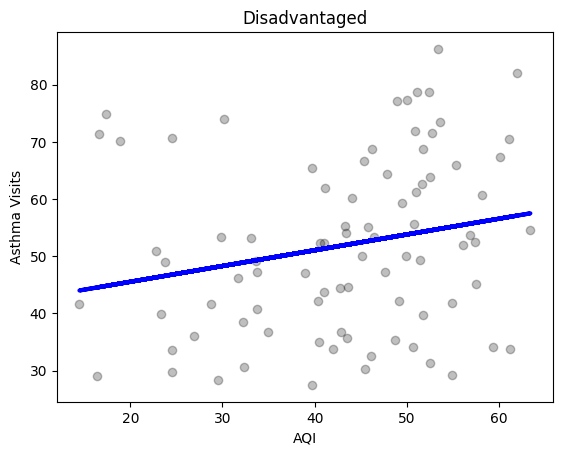

In [259]:
# run linear regression on disadvantaged counties

x_dis = disadvantaged_county_data["AverageAnnualAQI"]
y_dis = disadvantaged_county_data["NormalizedVisits"]

# In order to have an intercept, we need to add a column of 1's to X
x2_dis = sm.add_constant(x_dis)

# Fit the simple linear regression
sm_model_dis = sm.OLS(y_dis, x2_dis)
results_dis = sm_model_dis.fit()

# Make predictions using the linear regression
y_pred_dis = results_dis.predict(x2_dis)

# Plot 
plt.scatter(x_dis, y_dis,  color='black', alpha = 0.25)
plt.plot(x_dis, y_pred_dis, color='blue', linewidth=3)
plt.xlabel('AQI')
plt.ylabel('Asthma Visits')
plt.title('Disadvantaged')
plt.show()

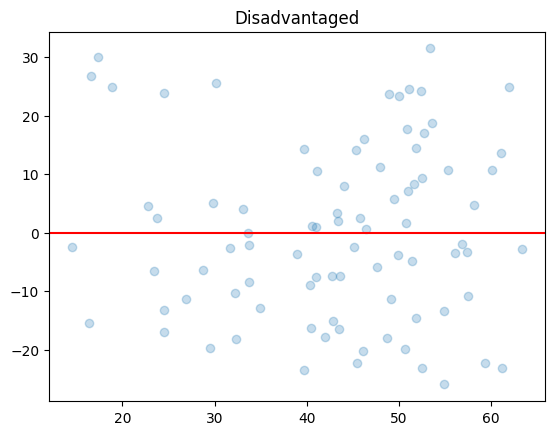

In [260]:
residuals_dis = y_dis - y_pred_dis
plt.scatter(x_dis, residuals_dis, alpha = 0.25)
plt.axhline(y=0, color = 'red')
plt.title("Disadvantaged")
plt.show()

In [261]:
print(results_dis.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedVisits   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.184
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0440
Time:                        11:50:34   Log-Likelihood:                -350.03
No. Observations:                  85   AIC:                             704.1
Df Residuals:                      83   BIC:                             708.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.0242      6.018  

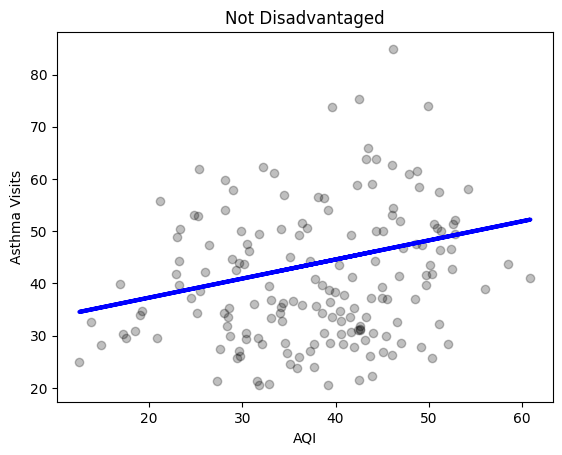

In [262]:
# not disadvantaged

x_no_dis = not_disadvantaged_county_data["AverageAnnualAQI"]
y_no_dis = not_disadvantaged_county_data["NormalizedVisits"]

# In order to have an intercept, we need to add a column of 1's to X
x2_no_dis = sm.add_constant(x_no_dis)

# Fit the simple linear regression
sm_model_no_dis = sm.OLS(y_no_dis, x2_no_dis)
results_no_dis = sm_model_no_dis.fit()

# Make predictions using the linear regression
y_pred_no_dis = results.predict(x2_no_dis)

# Plot 
plt.scatter(x_no_dis, y_no_dis,  color='black', alpha = 0.25)
plt.plot(x_no_dis, y_pred_no_dis, color='blue', linewidth=3)
plt.xlabel('AQI')
plt.ylabel('Asthma Visits')
plt.title('Not Disadvantaged')
plt.show()

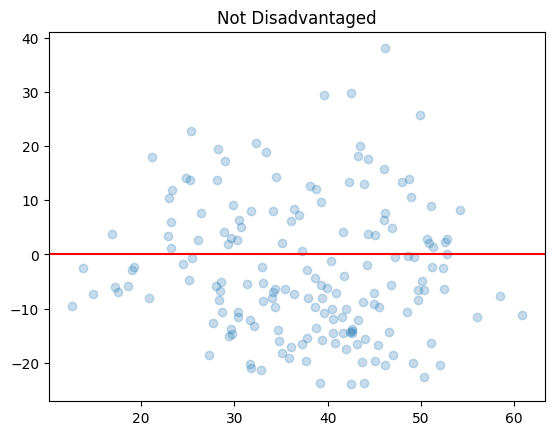

In [263]:
residuals_no_dis = y_no_dis - y_pred_no_dis
plt.scatter(x_no_dis, residuals_no_dis, alpha = 0.25)
plt.axhline(y=0, color = 'red')
plt.title("Not Disadvantaged")
plt.show()

In [264]:
print(results_no_dis.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedVisits   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.759
Date:                Sat, 16 Nov 2024   Prob (F-statistic):            0.00596
Time:                        11:50:34   Log-Likelihood:                -667.50
No. Observations:                 170   AIC:                             1339.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.6027      3.741  

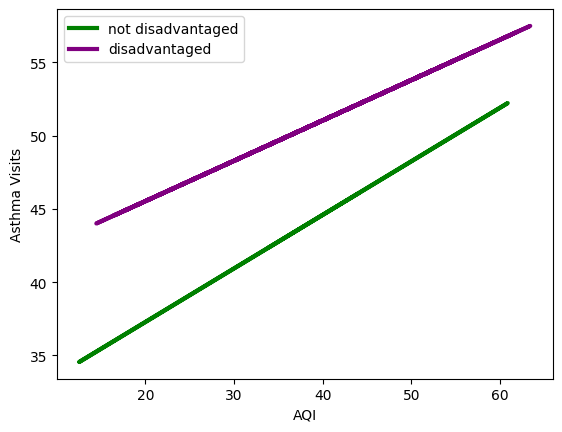

In [265]:
plt.plot(x_no_dis, y_pred_no_dis, color='green', linewidth=3, label="not disadvantaged")
plt.plot(x_dis, y_pred_dis, color='purple', linewidth=3, label="disadvantaged")
plt.xlabel('AQI')
plt.ylabel('Asthma Visits')
plt.legend()
plt.show()

<Axes: xlabel='CountyName', ylabel='AverageAnnualAQI'>

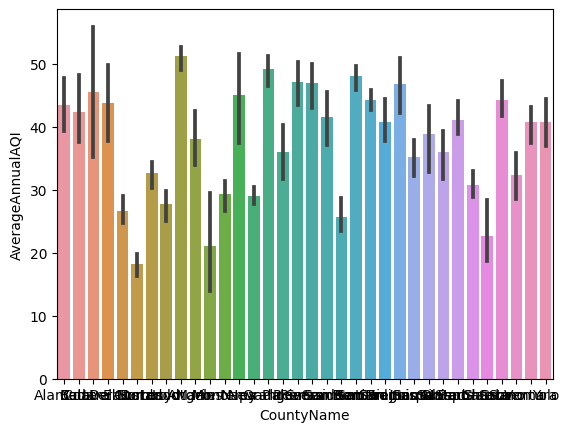

In [266]:
seaborn.barplot(data = not_disadvantaged_county_data, x="CountyName", y="AverageAnnualAQI")

<Axes: xlabel='CountyName', ylabel='AverageAnnualAQI'>

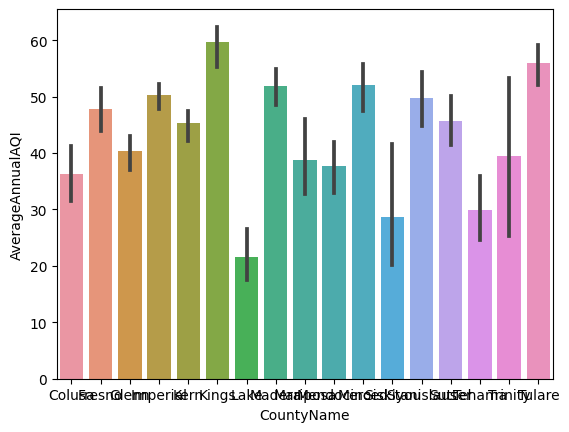

In [267]:
seaborn.barplot(data = disadvantaged_county_data, x="CountyName", y="AverageAnnualAQI")

In [268]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


aqi_data = pd.read_csv('air_quality_2021.csv')

CA_geo = gpd.read_file('tl_2019_06_cousub.shp')
CA_geo.crs = "EPSG:4326"

CA_geo = CA_geo.merge(aqi_data, left_on='COUNTY_NAME', right_on='County')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

CA_geo.plot(column='AQI', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

ax.set_title('California Air Quality Index (AQI) by County - 2021', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

plt.show()


DataSourceError: Invalid length for entity 3

In [ ]:
# import meteorology dataset

df_meteor = pd.read_csv('

# combine repeat counties'
# adding heat index data)

df_meteor['Heat Index'] = 
# adjustment 1
df_meteor['Avg Air Temp (F)']if df_meteor['Adf_meteor['Avg Rel Hum (%)'] Air Temp (F)df_meteor['Avg Air Temp (F)']]df_meteor['Avg Rel Hum (%)']= 80 and 
# df_meteor['Avg Air Temp (F)']ddf_meteor['Avg Air Temp (F)']ustment 2

df_meteor['Avg Rel Hum (%)']wdf_meteor['Avg Rel Hum (%)']n temp is beldf_meteor['Avg Air Temp (F)']wdf_meteor['Avg Air Temp (F)']8df_meteor['Avg Rel Hum (%)']

-42.379 +df_meteor['Avg Air Temp (F)']2df_meteor['Avg Rel Hum (%)']4df_meteor['Avg Rel Hum (%)']1523*T + 10.1df_meteor['Avg Air Temp (F)']*df_meteor['Avg Air Temp (F)']3df_meteor['Avg Rel Hum (%)']7df_meteor['Avg Rel Hum (%)']H - .22475541*T*RH df_meteor['Avg Rel Hum (%)'] <= 13 and - .00683783*T*T - .05481717*RH*RH + .001df_meteor['Avg Air Temp (F)'] <= 112:
    df_meteor['Heat Index'] = df_meteor['Heat Index'] -  ((13-df_meteor['Avg Rel Hum (%)'])/4)*np.sqrt((17-np.abs(df_meteor['Avg Air Temp (F)']-95))/17)22874*T*T*RH + 
if df_meteor['Avg Rel Hum (%)'] >= 85 and df_meteor['Avg Air Temp (F)'] >= 80 and df_meteor['Avg Air Temp (F)'] <= 87:
    df_meteor['Heat Index'] = df_meteor['Heat Index'] + ((df_meteor['Avg Rel Hum (%)']-85)/10) * ((87-df_meteor['Avg Air Temp (F)'])/5)00085282*T*RH*RH - .000001if df_meteor['Avg Rel Hum (%)'] >= 85 and df_meteor['Avg Air Temp (F)'] >= 80 and df_meteor['Avg Air Temp (F)'] <= 87:
    df_meteor['Heat Index'] = 0.5 * (df_meteor['Avg Air Temp (F)'] + 61.0 + [(df_meteor['Avg Air Temp (F)']-68.0)*1.2] + (df_meteor['Avg Rel Hum (%)']*0.094))9*T*T*RH*RH